### ورودی گرفتن دیتاست 

In [1]:
import pandas as pd
import numpy as np

file_path = 'flame-data.txt'  
data_frame = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])

print(data_frame.head())

data = data_frame[['x', 'y']].values

      x      y
0  1.85  27.80
1  1.35  26.65
2  1.40  23.25
3  0.85  23.05
4  0.50  22.35


### single link تعریف تابع محاسبه ی فاصله

In [2]:
def average_link(C, C_prime):
    return np.mean([np.linalg.norm(x - y) for x in C for y in C_prime])

### تعریف تابع خوشه بندی سلسله مراتبی

In [3]:

def hierarchical_clustering(data, distance_func):
    clusters = [[point] for point in data]
    merge_steps = []
    while len(clusters) > 1:
        min_distance = float('inf')
        clusters_to_merge = (0, 0)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = distance_func(clusters[i], clusters[j])
                if distance < min_distance:
                    min_distance = distance
                    clusters_to_merge = (i, j)
        i, j = clusters_to_merge
        merge_steps.append((i, j, min_distance))
        new_cluster = clusters[i] + clusters[j]
        clusters = [clusters[k] for k in range(len(clusters)) if k not in clusters_to_merge] + [new_cluster]
        print(f"{clusters}\n")
    return merge_steps

### اجرای مراحل خوشه بندی ، نمایش فرم خام دندوگرام خوشه بندی سلسله مراتبی

خوشه باقی میماند n-1 ر این بخش شما ابتدا خوشه بندی را به صورت خام مرحله به مرحله مشاهده میکنید. همانطور که انتظار میرفت در هر مرحله دو خوشه با یکدیگر ادغام میشوند و در پایان هر مرحله 

In [4]:
merge_steps_single = hierarchical_clustering(data, average_link)

[[array([ 1.85, 27.8 ])], [array([ 1.35, 26.65])], [array([ 1.4 , 23.25])], [array([ 0.85, 23.05])], [array([ 0.5 , 22.35])], [array([ 0.65, 21.35])], [array([ 1.1 , 22.05])], [array([ 1.35, 22.65])], [array([ 1.95, 22.8 ])], [array([ 2.4 , 22.45])], [array([ 1.8, 22. ])], [array([ 2.5 , 21.85])], [array([ 2.95, 21.4 ])], [array([ 1.9 , 21.25])], [array([ 1.35, 21.45])], [array([ 1.35, 20.9 ])], [array([ 1.25, 20.35])], [array([ 1.75, 20.05])], [array([ 2. , 20.6])], [array([ 2.5, 21. ])], [array([ 1.7 , 19.05])], [array([ 2.4 , 20.05])], [array([ 3.05, 20.45])], [array([ 3.7 , 20.45])], [array([ 3.45, 19.9 ])], [array([ 2.95, 19.5 ])], [array([ 2.4, 19.4])], [array([ 2.4 , 18.25])], [array([ 2.85, 18.75])], [array([ 3.25, 19.05])], [array([ 3.95, 19.6 ])], [array([ 2.7, 17.8])], [array([ 3.45, 18.05])], [array([ 3.8 , 18.55])], [array([ 4. , 19.1])], [array([ 4.45, 19.9 ])], [array([ 4.65, 19.15])], [array([ 4.85, 18.45])], [array([ 4.3 , 18.05])], [array([ 3.35, 17.3 ])], [array([ 3.

###  تعریف تابع نمایش واضح مراحل خوشه بندی و نمایش آن 

In [5]:

def print_merge_steps(merge_steps, method):
    print(f"\n{method} Linkage Merging Steps and Distances:")
    for step, (i, j, distance) in enumerate(merge_steps, 1):
        print(f"Step {step}: Merging clusters {i} and {j} with distance {distance}")


print_merge_steps(merge_steps_single, 'average')


average Linkage Merging Steps and Distances:
Step 1: Merging clusters 72 and 74 with distance 0.4031128874149261
Step 2: Merging clusters 227 and 234 with distance 0.41231056256176457
Step 3: Merging clusters 61 and 67 with distance 0.41231056256176485
Step 4: Merging clusters 224 and 225 with distance 0.42720018726587505
Step 5: Merging clusters 77 and 78 with distance 0.42720018726587533
Step 6: Merging clusters 153 and 154 with distance 0.4272001872658776
Step 7: Merging clusters 178 and 179 with distance 0.4301162633521296
Step 8: Merging clusters 79 and 80 with distance 0.4301162633521325
Step 9: Merging clusters 37 and 44 with distance 0.4472135954999579
Step 10: Merging clusters 204 and 206 with distance 0.4527692569068711
Step 11: Merging clusters 103 and 107 with distance 0.4609772228646436
Step 12: Merging clusters 62 and 63 with distance 0.460977222864644
Step 13: Merging clusters 197 and 198 with distance 0.460977222864644
Step 14: Merging clusters 206 and 207 with distanc

### جهت نمایش زیبا تر و شهودی تر نمایه دندوگرام خوشه بندی سلسله مراتبی از توابع خارجی صرفا در این سکشن استفاده کردیم!

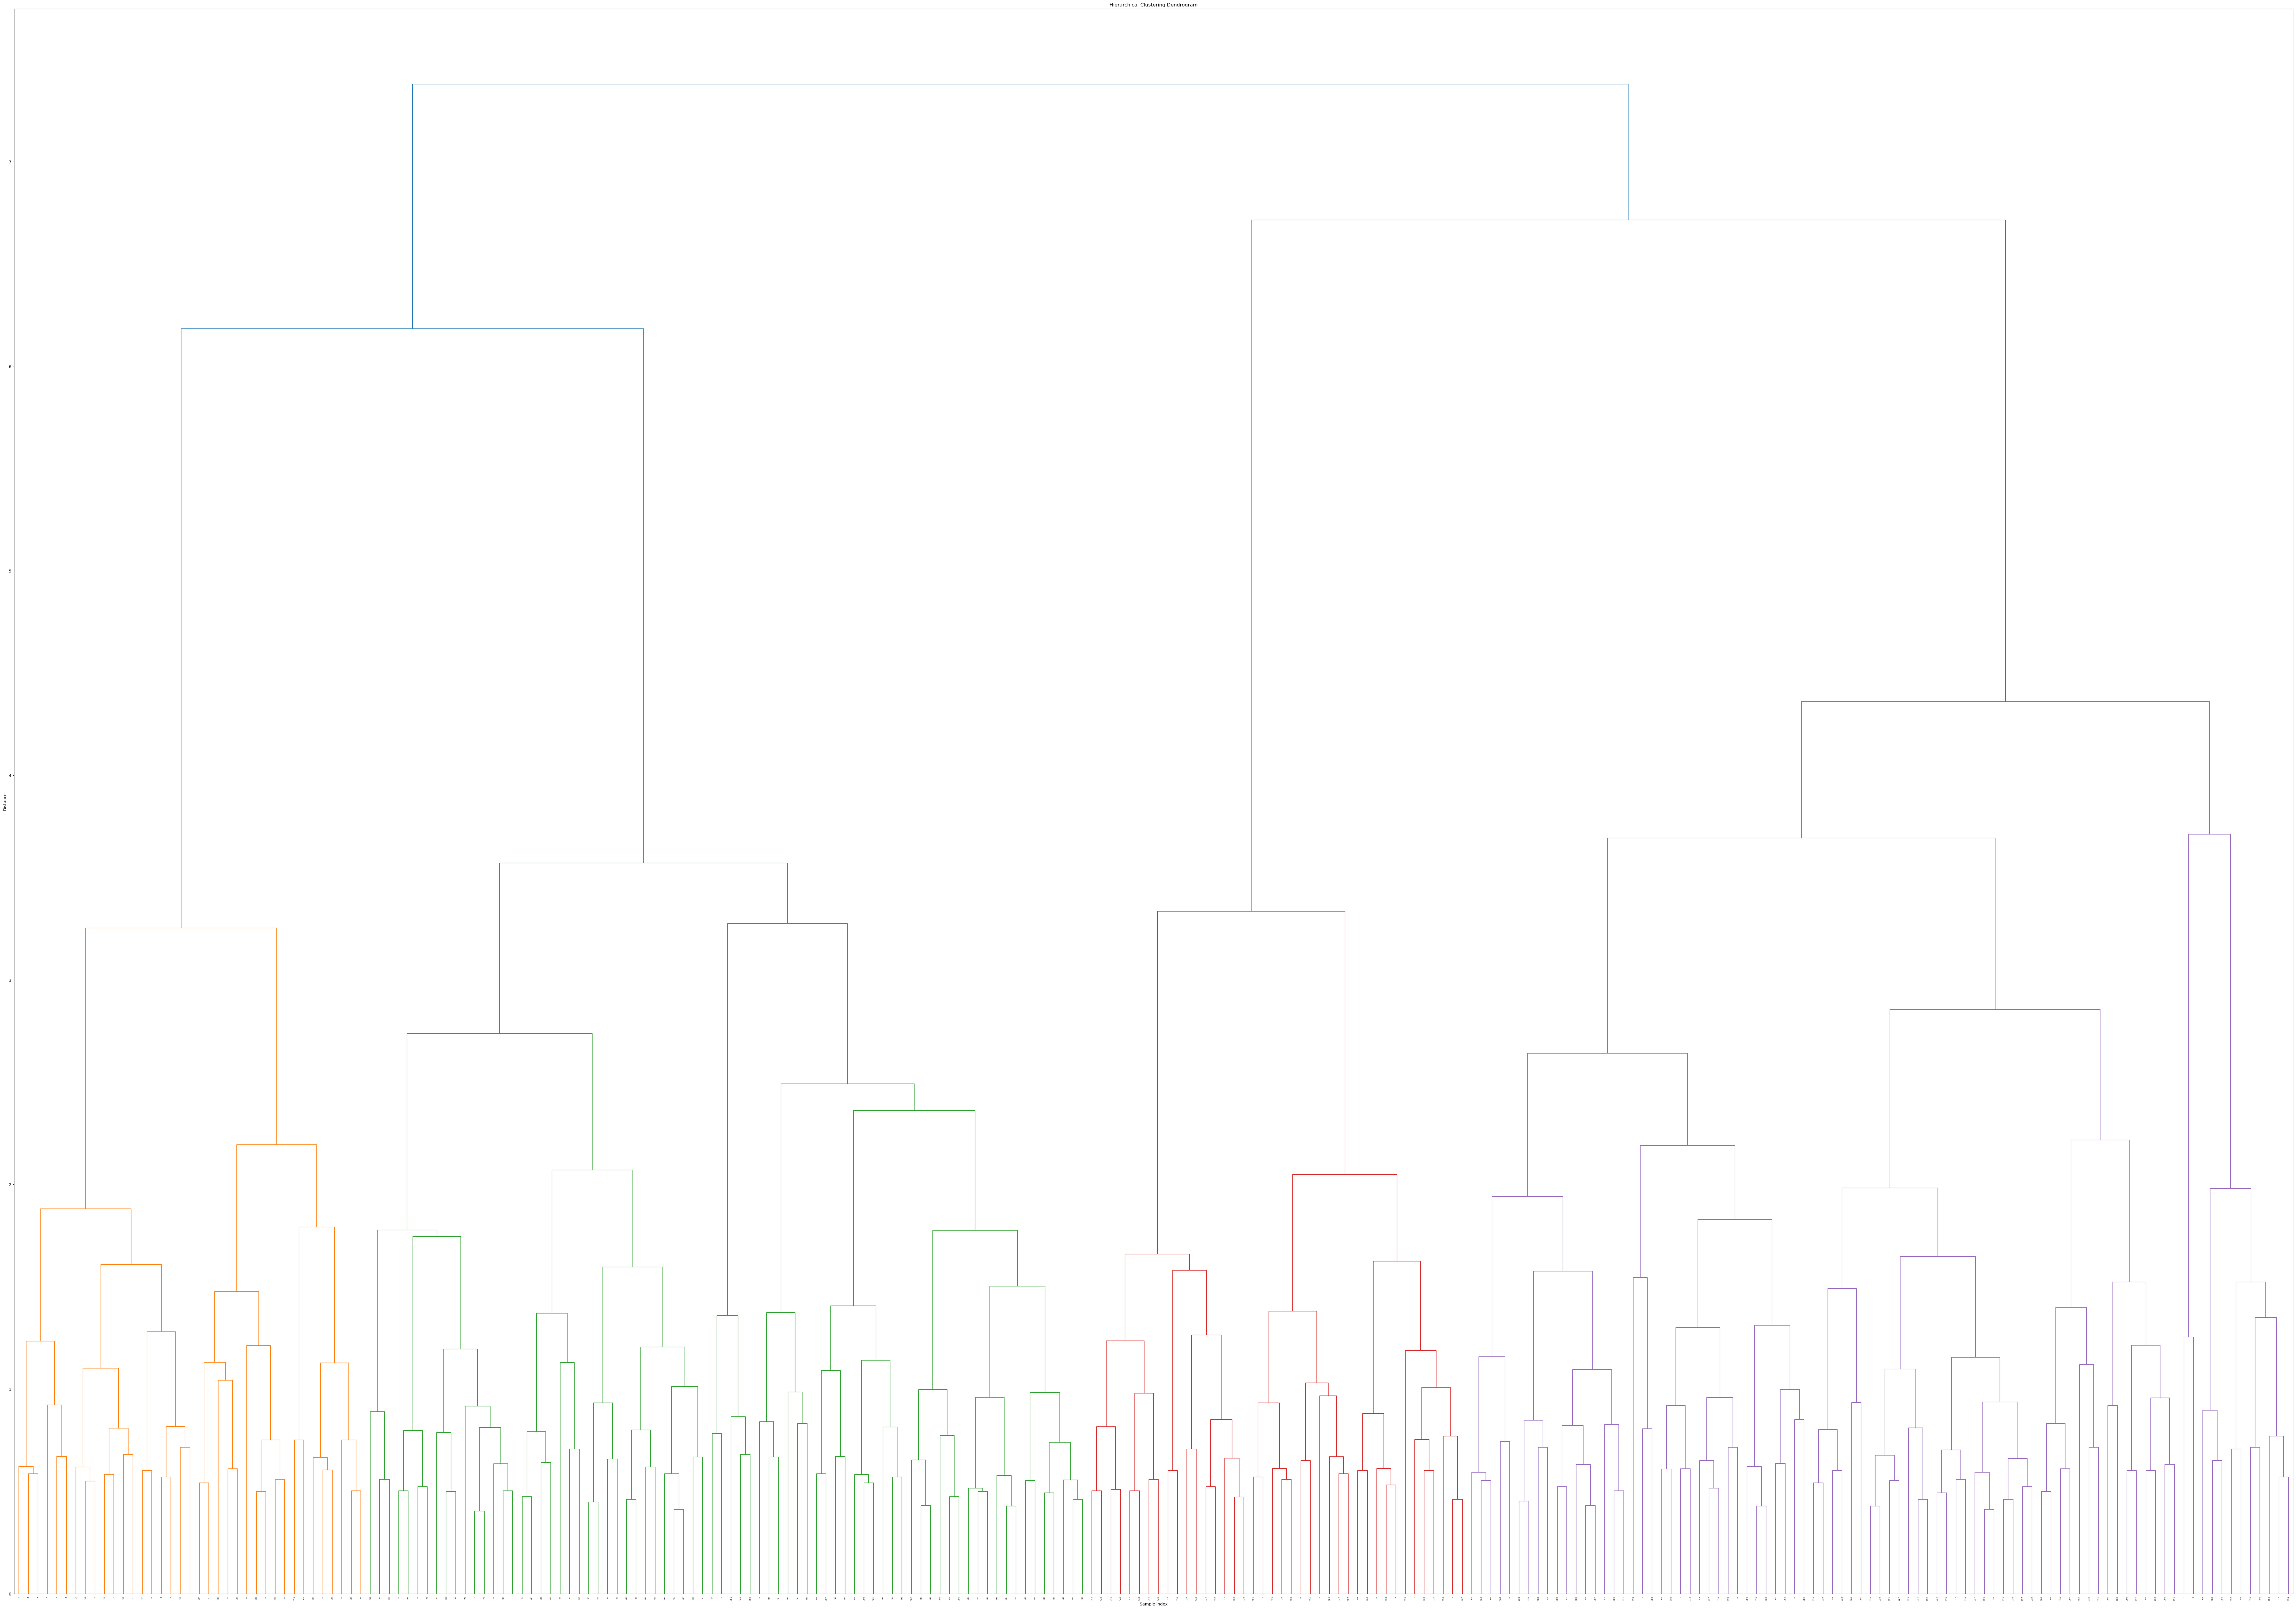

In [6]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform



linkage_data = linkage(data, method='average', metric='euclidean')


plt.figure(figsize=(100, 70))
dendrogram(linkage_data)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


### σ (sigmia) محاسبه ی مقدار
در این مرحله مقدار سیگما که طبق شرح پروژه گفته شده بود برابر مربع متوسط
فاصله در مجموعه داده باشد نسبت به دیتاست داده شده پیدا میکنیم و برابر سیگما قرار میدهیم.

In [7]:
def calculate_sigma(data):
    n = len(data)
    total_distance = 0
    for i in range(n):
        for j in range(i + 1, n):
            total_distance += np.linalg.norm(data[i] - data[j]) ** 2
    sigma = total_distance / (n * (n - 1) / 2)
    return sigma

sigma = calculate_sigma(data)
print(f"Sigma: {sigma}")


Sigma: 43.406791753835606


### تعریف تابع هزینه ی داسگوپتا
+ جای گذاری مقدار محاسبه شده ی سیگما 

In [8]:
def similarity(x, y, sigma=43):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * sigma ** 2))

def dasgupta_cost(data, merge_steps, sigma=43):
    n = len(data)
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            W[i, j] = similarity(data[i], data[j], sigma=43)
    
    cost = 0
    clusters = [{i} for i in range(n)]
    for step in merge_steps:
        c1, c2, dist = step
        c1_indices = c1
        c2_indices = c2
        new_cluster = c1_indices.union(c2_indices)
        for i in c1_indices:
            for j in c2_indices:
                cost += dist * W[i, j] * len(new_cluster)
        clusters = [c for c in clusters if c != c1_indices and c != c2_indices] + [new_cluster]
    return cost


### محاسبه ی هزینه ی درخت دو دویی دندوگرام ساخته شده با روش سینگل لینک با تابع داسگوپتایی که تعریف کردیم
در این بخش ما برای رفع ارور های از نوع تایپ ارور که به آن بر میخوردیم مجبور به ایجاد تغییرات جزئی در تابع خوشه بندی سلسله مراتبی مان شدیم تا به جای خروجی هایی از جنس مختصات نقاط ، شماره (عنوان ، اندیس) نقاط را به ما برگرداند لذا در خروجی کد زیر دوباره شاهد مراحل خوشه بندی به فرم خام این بار با اندیس نقاط و در پایان مراحل شاهد مقدار هزینه ی محاسبه شده توسط تابع هزینه ی داسگوپتایمان هستیم.

In [ ]:
import numpy as np
import pandas as pd

def similarity(x, y, sigma=43):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * sigma ** 2))

def average_link(C, C_prime):
    return np.mean([np.linalg.norm(x - y) for x in C for y in C_prime])

def hierarchical_clustering(data, distance_func):
    clusters = [{i} for i in range(len(data))]
    merge_steps = []
    while len(clusters) > 1:
        min_distance = float('inf')
        clusters_to_merge = (0, 0)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = distance_func([data[list(clusters[i])[0]]], [data[list(clusters[j])[0]]])
                if distance < min_distance:
                    min_distance = distance
                    clusters_to_merge = (i, j)
        i, j = clusters_to_merge
        merge_steps.append((clusters[i], clusters[j], min_distance))
        new_cluster = clusters[i].union(clusters[j])
        clusters = [clusters[k] for k in range(len(clusters)) if k not in clusters_to_merge] + [new_cluster]
        print(f"{clusters}\n")
    return merge_steps

def dasgupta_cost(data, merge_steps, sigma=43):
    n = len(data)
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            W[i, j] = similarity(data[i], data[j], sigma=43)
    
    cost = 0
    clusters = [{i} for i in range(n)]
    for step in merge_steps:
        c1, c2, dist = step
        c1_indices = c1
        c2_indices = c2
        new_cluster = c1_indices.union(c2_indices)
        for i in c1_indices:
            for j in c2_indices:
                cost += dist * W[i, j] * len(new_cluster)
        clusters = [c for c in clusters if c != c1_indices and c != c2_indices] + [new_cluster]
    return cost

file_path = 'flame-data.txt'  
data_frame = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])

data = data_frame[['x', 'y']].values

merge_steps_average = hierarchical_clustering(data, average_link)

cost = dasgupta_cost(data, merge_steps_average)
print("Dasgupta Cost:", cost)
